## Importing necessary libraries

In [1]:
%reload_ext autoreload
%autoreload 2

import os, sys
import re
import json
import glob
import datetime
from collections import Counter

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from wordcloud import WordCloud

## Loading the dataset

In [4]:
# Add parent directory to path to import modules from src
rpath = os.path.abspath('..')
if rpath not in sys.path:
   sys.path.insert(0, rpath)

from src.loader import SlackDataLoader
import src.utils as utils
from src.utils import get_messages_dict

In [3]:
#rpath = os.path.abspath('..')
#if rpath not in sys.path:
 #   sys.path.insert(0, rpath)

# Provide the path to the Slack exported data folder
slack_data_path = os.path.abspath('C:/Users/Jojo/Desktop/10A/10x/Anonymized_B6SlackExport_25Nov23/anonymized')

# Create an instance of SlackDataLoader
slack_data_loader = SlackDataLoader(slack_data_path)

# Get the users and channels from the Slack data
users = slack_data_loader.get_users()
channels = slack_data_loader.get_channels()
channel_names = []
user_names = []

for channel in channels:
    channel_names.append(channel['name'])

for user in users:
    user_names.append(user['name'])

In [4]:
# Assuming SlackDataLoader has a method get_channel_messages that retrieves channel messages
# This example assumes you have a method in SlackDataLoader to get channel messages

channel_messages = []

# Retrieve messages from each channel
for channel in channels:
    channel_messages.extend(slack_data_loader.get_channel_messages(channel['name']))

# Convert the list of messages into a DataFrame
messages_df = pd.DataFrame(channel_messages)

# Now you have a DataFrame 'messages_df' containing messages from all channels


## Loading the dataset (Mine)

In [5]:
from src.loader import SlackDataLoader
import src.utils as utils
from src.utils import get_messages_dict

In [6]:


# Set the path to the users.json file
users_file_path = 'C:/Users/Jojo/Desktop/10A/10x/Anonymized_B6SlackExport_25Nov23/anonymized/'

# Initialize the SlackDataLoader
loader = SlackDataLoader(users_file_path)

In [7]:
path_channel = 'C:/Users/Jojo/Desktop/10A/10x/Anonymized_B6SlackExport_25Nov23/anonymized/all-broadcast/'

data = loader.slack_parser(path_channel)

In [8]:
data

,msg_type,msg_content,sender_name,msg_sent_time,msg_dist_type,time_thread_start,reply_count,reply_users_count,reply_users,tm_thread_end,channel
0,message,Hi all - Note that you have been shared a week...,Carlos Gross,1661143290.593769,text,0,0,0,0,0,
1,message,Note: Ensure that you are logged in with the e...,Carlos Gross,1661143383.691609,text,0,0,0,0,0,
2,message,If you are not able to view the folder - first...,Carlos Gross,1661143499.485659,text,0,0,0,0,0,
3,message,If you are having any issues with that - pleas...,Carlos Gross,1661143530.989529,text,0,0,0,0,0,
4,message,Congrats and welcome to B6 Intensive Training ...,Carlos Gross,1661143562.521109,text,0,0,0,0,0,
...,...,...,...,...,...,...,...,...,...,...,...
532,message,*COUNT DOWN*:boom:\n*35 minutes to go*\n*Are y...,Vanessa Norman,1668691557.230939,text,0,0,0,0,0,
533,message,"STARTING NOW, ARE YOU IN\n<!here>",Vanessa Norman,1668693497.289059,text,0,0,0,0,0,
534,message,*JOB SEARCH WORKSPACE*\n<!channel> kindly join...,Garrett Bell,1669495108.850519,text,0,0,0,0,0,
535,message,"Hey <!channel>, can everyone work on deploymen...",Brittany Garcia,1669840709.589139,text,0,0,0,0,0,


### Getting data for all channels

In [9]:
import os
import pandas as pd
#from loader import SlackDataLoader

# Set the path to the folder containing all the channels
channels_path = 'C:/Users/Jojo/Desktop/10A/10x/Anonymized_B6SlackExport_25Nov23/anonymized/'

# Initialize an empty dataframe to store the concatenated data
data1 = pd.DataFrame()

# Initialize the SlackDataLoader
loader = SlackDataLoader(channels_path)

# Get a list of all channel folders
channel_folders = [folder_name for folder_name in os.listdir(channels_path) if os.path.isdir(os.path.join(channels_path, folder_name))]
print(channel_folders)
# Loop through the channel folders and load JSON data for each channel
for channel_folder in channel_folders:
    channel_path = os.path.join(channels_path, channel_folder) + "/"
    data = loader.slack_parser(channel_path)
    
    # Add the channel column to the data
    data['channel'] = channel_folder
    
    # Concatenate the data to the existing data
    data1 = pd.concat([data1, data])

['ab_test-group', 'adludios-challange', 'all-broadcast', 'all-career-exercises', 'all-community-building', 'all-de-week12', 'all-ideas', 'all-ml-week12', 'all-resources', 'all-technical-support', 'all-web3-week12', 'all-week1', 'all-week10', 'all-week11', 'all-week12', 'all-week2', 'all-week3', 'all-week4', 'all-week5', 'all-week6', 'all-week7', 'all-week8', 'all-week9', 'batch6_week4_studygroup', 'chang-w11', 'data-engineering', 'dsa-sql', 'gokada-challenge-presentation', 'happy-new-year-study-group', 'kafka_de', 'machine-learning', 'random', 'study-group', 'team-10', 'tenx-bot', 'week-11-group4', 'week-2-group-8', 'week2-group', 'week4-teamwork']


In [10]:
data1

,msg_type,msg_content,sender_name,msg_sent_time,msg_dist_type,time_thread_start,reply_count,reply_users_count,reply_users,tm_thread_end,channel
0,message,"Hi guys,\nI thought having a group chat would ...",Anita Rodriguez,1661766066.863109,text,0,0,0,0,0,ab_test-group
1,message,good!!,Michael Gonzalez,1661766159.852649,text,0,0,0,0,0,ab_test-group
2,message,Thanks <@U03U9FWPNCE>,Robert Carter,1661766226.215889,text,0,0,0,0,0,ab_test-group
3,message,Nice <@U03U9FWPNCE>,Phillip Atkins,1661766241.597379,text,0,0,0,0,0,ab_test-group
4,message,I have been missing deadlines and I am trying ...,Anita Rodriguez,1661766295.939119,text,0,0,0,0,0,ab_test-group
...,...,...,...,...,...,...,...,...,...,...,...
76,message,yohanes also,Paula Bryant,1663093203.238019,text,0,0,0,0,0,week4-teamwork
77,message,the connection is very slow,Nancy Craig,1663093633.896039,text,0,0,0,0,0,week4-teamwork
78,message,guys my network is not working,Paula Bryant,1663094118.932099,text,0,0,0,0,0,week4-teamwork
79,message,Okay bro we will update you.,Nicholas Friedman,1663094488.880729,text,0,0,0,0,0,week4-teamwork


## Data Overview

In [10]:
# preview of first five rows
messages_df.head()

,type,subtype,ts,user,text,client_msg_id,blocks,team,user_team,source_team,...,hidden,bot_id,app_id,bot_profile,channel,room,no_notifications,permalink,bot_link,inviter
0,message,channel_join,1660301317.785879,U03TEPYRM2P,<@U03TEPYRM2P> has joined the channel,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,message,channel_join,1660301593.241889,U03T89ACUUW,<@U03T89ACUUW> has joined the channel,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,message,channel_join,1660833152.540199,U03U9DB7REG,<@U03U9DB7REG> has joined the channel,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,message,channel_join,1660833720.685639,U03UKL27B0R,<@U03UKL27B0R> has joined the channel,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,message,channel_join,1660838313.991269,U03UL5LSTG9,<@U03UL5LSTG9> has joined the channel,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# preview of last five rows
messages_df.tail()

,type,subtype,ts,user,text,client_msg_id,blocks,team,user_team,source_team,...,hidden,bot_id,app_id,bot_profile,channel,room,no_notifications,permalink,bot_link,inviter
20005,message,channel_join,1668760648.789009,U03UUS0MZCZ,<@U03UUS0MZCZ> has joined the channel,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U03UL5LSTG9
20006,message,channel_join,1668760648.854949,U03UG4Q7V42,<@U03UG4Q7V42> has joined the channel,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U03UL5LSTG9
20007,message,channel_join,1668760648.921119,U03U9DB7REG,<@U03U9DB7REG> has joined the channel,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U03UL5LSTG9
20008,message,channel_join,1668760648.982879,U03UUN8M4RX,<@U03UUN8M4RX> has joined the channel,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U03UL5LSTG9
20009,message,channel_join,1668760649.047239,U03UKL27B0R,<@U03UKL27B0R> has joined the channel,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U03UL5LSTG9


In [ ]:
# shape of our train data
messages_df.shape

(20010, 39)

In [ ]:
# data info
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20010 entries, 0 to 20009
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               20010 non-null  object 
 1   subtype            1066 non-null   object 
 2   ts                 20010 non-null  object 
 3   user               20010 non-null  object 
 4   text               20010 non-null  object 
 5   client_msg_id      18902 non-null  object 
 6   blocks             18630 non-null  object 
 7   team               17751 non-null  object 
 8   user_team          17748 non-null  object 
 9   source_team        17748 non-null  object 
 10  user_profile       17748 non-null  object 
 11  reactions          3986 non-null   object 
 12  thread_ts          10919 non-null  object 
 13  reply_count        2026 non-null   float64
 14  reply_users_count  2026 non-null   float64
 15  latest_reply       2026 non-null   object 
 16  reply_users        202

In [ ]:
messages_df.columns

Index(['type', 'subtype', 'ts', 'user', 'text', 'client_msg_id', 'blocks',
       'team', 'user_team', 'source_team', 'user_profile', 'reactions',
       'thread_ts', 'reply_count', 'reply_users_count', 'latest_reply',
       'reply_users', 'replies', 'is_locked', 'subscribed', 'parent_user_id',
       'edited', 'files', 'upload', 'display_as_bot', 'attachments', 'root',
       'last_read', 'x_files', 'hidden', 'bot_id', 'app_id', 'bot_profile',
       'channel', 'room', 'no_notifications', 'permalink', 'bot_link',
       'inviter'],
      dtype='object')

### Columns we can get from a slack message<br>

message_type, message_content, sender_id, time_sent, message_distribution, time_thread_start, reply_count, reply_user_count, time_thread_end, reply_users

From a single slack message, we can get <br>

1. The message<br>
2. Type (message, file, link, etc)<br>
3. The sender_id (assigned by slack)<br>
4. The time the message was sent<br>
5. The team (i don't know what that is now)<br>
6. The type of the message (broadcast message, inhouse, just messgae)<br>
7. The thread the message generated (from here we can go):<br>
    7.1 Text/content of the message<br>
    7.2 The thread time of the message<br>
    7.3 The thread count (reply count)<br>
    7.4 The number of user that reply the message (count of users that participated in the thread)<br>
    7.5 The time the last thread message was sent <br>
    7.6 The users that participated in the thread (their ids are stored as well)<br>

In [ ]:
# combine all json file in all-weeks8-9
def slack_parser(path_channel):
    """ parse slack data to extract useful informations from the json file
        step of execution
        1. Import the required modules
        2. read all json file from the provided path
        3. combine all json files in the provided path
        4. extract all required informations from the slack data
        5. convert to dataframe and merge all
        6. reset the index and return dataframe
    """

    # specify path to get json files
    combined = []
    for json_file in glob.glob(f"{path_channel}*.json"):
        with open(json_file, 'r', encoding="utf8") as slack_data:
            combined.append(slack_data)

    # loop through all json files and extract required informations
    dflist = []
    for slack_data in combined:

        msg_type, msg_content, sender_id, time_msg, msg_dist, time_thread_st, reply_users, \
        reply_count, reply_users_count, tm_thread_end = [],[],[],[],[],[],[],[],[],[]

        for row in slack_data:
            if 'bot_id' in row.keys():
                continue
            else:
                msg_type.append(row['type'])
                msg_content.append(row['text'])
                if 'user_profile' in row.keys(): sender_id.append(row['user_profile']['real_name'])
                else: sender_id.append('Not provided')
                time_msg.append(row['ts'])
                if 'blocks' in row.keys() and len(row['blocks'][0]['elements'][0]['elements']) != 0 :
                     msg_dist.append(row['blocks'][0]['elements'][0]['elements'][0]['type'])
                else: msg_dist.append('reshared')
                if 'thread_ts' in row.keys():
                    time_thread_st.append(row['thread_ts'])
                else:
                    time_thread_st.append(0)
                if 'reply_users' in row.keys(): reply_users.append(",".join(row['reply_users'])) 
                else:    reply_users.append(0)
                if 'reply_count' in row.keys():
                    reply_count.append(row['reply_count'])
                    reply_users_count.append(row['reply_users_count'])
                    tm_thread_end.append(row['latest_reply'])
                else:
                    reply_count.append(0)
                    reply_users_count.append(0)
                    tm_thread_end.append(0)
        data = zip(msg_type, msg_content, sender_id, time_msg, msg_dist, time_thread_st,
         reply_count, reply_users_count, reply_users, tm_thread_end)
        columns = ['msg_type', 'msg_content', 'sender_name', 'msg_sent_time', 'msg_dist_type',
         'time_thread_start', 'reply_count', 'reply_users_count', 'reply_users', 'tm_thread_end']

        df = pd.DataFrame(data=data, columns=columns)
        df = df[df['sender_name'] != 'Not provided']
        dflist.append(df)

    dfall = pd.concat(dflist, ignore_index=True)
    dfall['channel'] = path_channel.split('/')[-1].split('.')[0]        
    dfall = dfall.reset_index(drop=True)
    
    return dfall


def parse_slack_reaction(path, channel):
    """get reactions"""
    dfall_reaction = pd.DataFrame()
    combined = []
    for json_file in glob.glob(f"{path}*.json"):
        with open(json_file, 'r') as slack_data:
            combined.append(slack_data)

    reaction_name, reaction_count, reaction_users, msg, user_id = [], [], [], [], []

    for k in combined:
        slack_data = json.load(open(k.name, 'r', encoding="utf-8"))
        
        for i_count, i in enumerate(slack_data):
            if 'reactions' in i.keys():
                for j in range(len(i['reactions'])):
                    msg.append(i['text'])
                    user_id.append(i['user'])
                    reaction_name.append(i['reactions'][j]['name'])
                    reaction_count.append(i['reactions'][j]['count'])
                    reaction_users.append(",".join(i['reactions'][j]['users']))
                
    data_reaction = zip(reaction_name, reaction_count, reaction_users, msg, user_id)
    columns_reaction = ['reaction_name', 'reaction_count', 'reaction_users_count', 'message', 'user_id']
    df_reaction = pd.DataFrame(data=data_reaction, columns=columns_reaction)
    df_reaction['channel'] = channel
    return df_reaction

def get_community_participation(path):
    """ specify path to get json files"""
    combined = []
    comm_dict = {}
    for json_file in glob.glob(f"{path}*.json"):
        with open(json_file, 'r') as slack_data:
            combined.append(slack_data)
    # print(f"Total json files is {len(combined)}")
    for i in combined:
        a = json.load(open(i.name, 'r', encoding='utf-8'))

        for msg in a:
            if 'replies' in msg.keys():
                for i in msg['replies']:
                    comm_dict[i['user']] = comm_dict.get(i['user'], 0)+1
    return comm_dict

In [ ]:
def convert_2_timestamp(column, data):
    """convert from unix time to readable timestamp
        args: column: columns that needs to be converted to timestamp
                data: data that has the specified column
    """
    if column in data.columns.values:
        timestamp_ = []
        for time_unix in data[column]:
            if time_unix == 0:
                timestamp_.append(0)
            else:
                a = datetime.datetime.fromtimestamp(float(time_unix))
                timestamp_.append(a.strftime('%Y-%m-%d %H:%M:%S'))
        return timestamp_
    else: 
        print(f"{column} not in data")

def get_tagged_users(df):
    """get all @ in the messages"""

    return df['msg_content'].map(lambda x: re.findall(r'@U\w+', x))


    
def map_userid_2_realname(user_profile: dict, comm_dict: dict, plot=False):
    """
    map slack_id to realnames
    user_profile: a dictionary that contains users info such as real_names
    comm_dict: a dictionary that contains slack_id and total_message sent by that slack_id
    """
    user_dict = {} # to store the id
    real_name = [] # to store the real name
    ac_comm_dict = {} # to store the mapping
    count = 0
    # collect all the real names
    for i in range(len(user_profile['profile'])):
        real_name.append(dict(user_profile['profile'])[i]['real_name'])

    # loop the slack ids
    for i in user_profile['id']:
        user_dict[i] = real_name[count]
        count += 1

    # to store mapping
    for i in comm_dict:
        if i in user_dict:
            ac_comm_dict[user_dict[i]] = comm_dict[i]

    ac_comm_dict = pd.DataFrame(data= zip(ac_comm_dict.keys(), ac_comm_dict.values()),
    columns=['LearnerName', '# of Msg sent in Threads']).sort_values(by='# of Msg sent in Threads', ascending=False)
    
    if plot:
        ac_comm_dict.plot.bar(figsize=(15, 7.5), x='LearnerName', y='# of Msg sent in Threads')
        plt.title('Student based on Message sent in thread', size=20)
        
    return ac_comm_dict

In [ ]:
def get_top_20_user(data, channel='Random'):
    """get user with the highest number of message sent to any channel"""

    data['sender_name'].value_counts()[:20].plot.bar(figsize=(15, 7.5))
    plt.title(f'Top 20 Message Senders in #{channel} channels', size=15, fontweight='bold')
    plt.xlabel("Sender Name", size=18); plt.ylabel("Frequency", size=14);
    plt.xticks(size=12); plt.yticks(size=12);
    plt.show()

    data['sender_name'].value_counts()[-10:].plot.bar(figsize=(15, 7.5))
    plt.title(f'Bottom 10 Message Senders in #{channel} channels', size=15, fontweight='bold')
    plt.xlabel("Sender Name", size=18); plt.ylabel("Frequency", size=14);
    plt.xticks(size=12); plt.yticks(size=12);
    plt.show()

def draw_avg_reply_count(data, channel='Random'):
    """who commands many reply?"""

    data.groupby('sender_name')['reply_count'].mean().sort_values(ascending=False)[:20]\
        .plot(kind='bar', figsize=(15,7.5));
    plt.title(f'Average Number of reply count per Sender in #{channel}', size=20, fontweight='bold')
    plt.xlabel("Sender Name", size=18); plt.ylabel("Frequency", size=18);
    plt.xticks(size=14); plt.yticks(size=14);
    plt.show()

def draw_avg_reply_users_count(data, channel='Random'):
    """who commands many user reply?"""

    data.groupby('sender_name')['reply_users_count'].mean().sort_values(ascending=False)[:20].plot(kind='bar',
     figsize=(15,7.5));
    plt.title(f'Average Number of reply user count per Sender in #{channel}', size=20, fontweight='bold')
    plt.xlabel("Sender Name", size=18); plt.ylabel("Frequency", size=18);
    plt.xticks(size=14); plt.yticks(size=14);
    plt.show()

def draw_wordcloud(msg_content, week):    
    # word cloud visualization
    allWords = ' '.join([twts for twts in msg_content])
    wordCloud = WordCloud(background_color='#975429', width=500, height=300, random_state=21, max_words=500, mode='RGBA',
                            max_font_size=140, stopwords=stopwords.words('english')).generate(allWords)
    plt.figure(figsize=(15, 7.5))
    plt.imshow(wordCloud, interpolation="bilinear")
    plt.axis('off')
    plt.tight_layout()
    plt.title(f'WordCloud for {week}', size=30)
    plt.show()

def draw_user_reaction(data, channel='General'):
    data.groupby('sender_name')[['reply_count', 'reply_users_count']].sum()\
        .sort_values(by='reply_count',ascending=False)[:10].plot(kind='bar', figsize=(15, 7.5))
    plt.title(f'User with the most reaction in #{channel}', size=25);
    plt.xlabel("Sender Name", size=18); plt.ylabel("Frequency", size=18);
    plt.xticks(size=14); plt.yticks(size=14);
    plt.show()

## Insight Extraction

Below are some useful questions to answer. Feel free to explore to answer other interesting questions that may be of help to get insight about student's behaviour, need, and future performance 

In [ ]:
# which user has the highest number of reply counts?
top_user= messages_df.groupby(['user'])['reply_count'].sum().sort_values(ascending=False).reset_index()
top_user

,user,reply_count
0,U03V6HMRPGQ,727.0
1,U03V1AM5TFA,614.0
2,U03UH397319,453.0
3,U03UJKJGRAQ,443.0
4,U03UVHCV6KB,435.0
...,...,...
62,U03TX2VN6H5,0.0
63,U03UCCRJME2,0.0
64,U03VAH809FC,0.0
65,U03UK9CB71A,0.0


- User PGQ has the highest reply count.

ValueError: `dataset` input should have multiple elements.

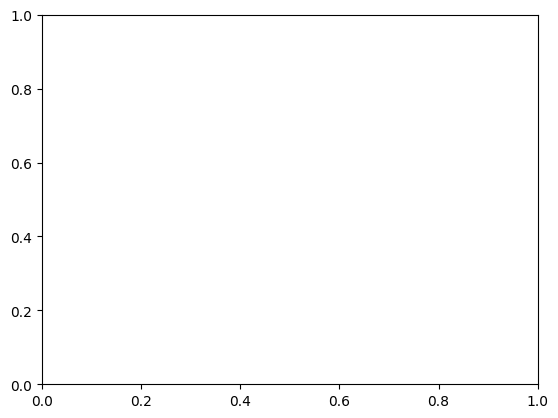

In [ ]:
sns.histplot(data=messages_df, x='reply_count', hue='channel', kde=True);

In [ ]:
# what is the time range of the day that most messages are sent?


In [ ]:
# what kind of messages are replied faster than others?

In [ ]:
# Relationship between # of messages and # of reactions

In [ ]:
# Classify messages into different categories such as questions, answers, comments, etc.

In [ ]:
# Which users got the most reactions?

In [ ]:
# Model topics mentioned in the channel

In [ ]:
# What are the topics that got the most reactions?

### Harder questions to look into

In [ ]:
# Based on messages, reactions, references shared, and other relevant data such as classification of questions into techical question, comment, answer, aorder stu the python, statistics, and sql skill level of a user?